In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [3]:
train_idg = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 30,  
    zoom_range = 0.2, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip = True,
)
test_idg = ImageDataGenerator(
    rescale = 1./255.
)
val_idg = ImageDataGenerator(
    rescale=1./255.
)

In [4]:
IMG_SIZE = (224, 224)

train = train_idg.flow_from_directory('chest x-rays/chest_xray/train', 
                                      class_mode='binary',
                                      color_mode="grayscale",
                                      target_size = IMG_SIZE
                                     )
test = test_idg.flow_from_directory('chest x-rays/chest_xray/test', 
                                    class_mode='binary',
                                    color_mode="grayscale",
                                    target_size = IMG_SIZE
                                   )

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
trainX, trainY = next(train)
testX, testY = next(test)

In [6]:
print(len(trainX), len(trainY))

32 32


In [7]:
print('Train X=%s Y=%s' %(trainX.shape, trainY.shape))
print('Test X=%s Y=%s' %(testX.shape, testY.shape))

Train X=(32, 224, 224, 1) Y=(32,)
Test X=(32, 224, 224, 1) Y=(32,)


C:\Users\mmort\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

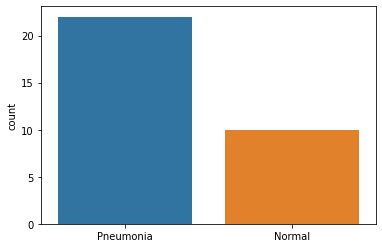

In [8]:
labels = ['Pneumonia' if label == 0 else 'Normal' for label in trainY]
sns.countplot(labels)

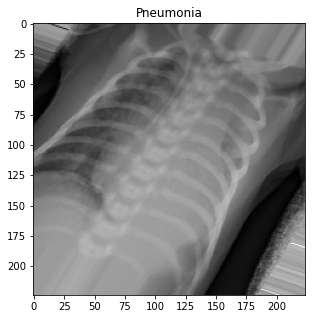

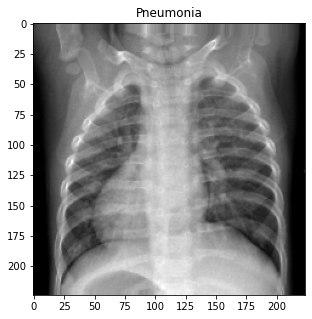

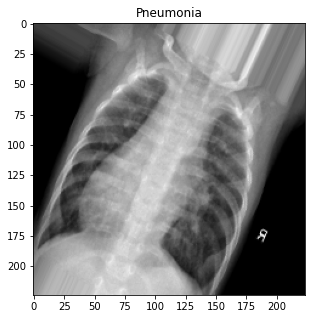

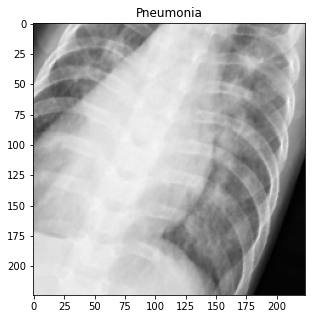

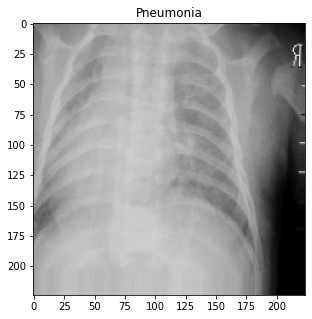

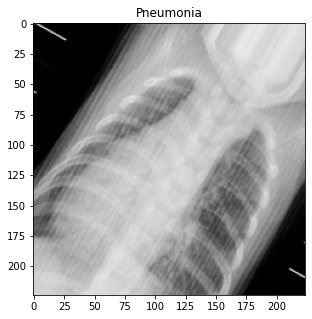

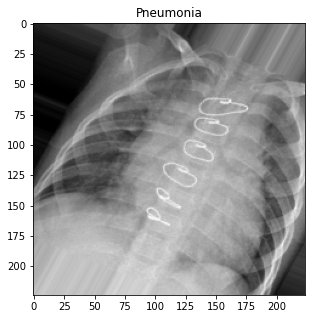

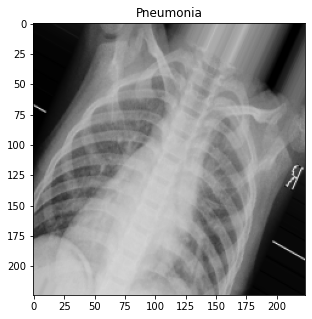

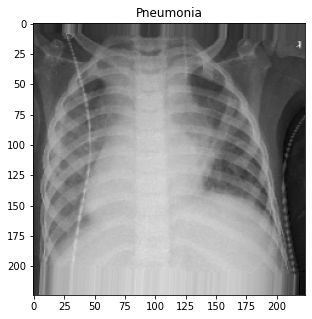

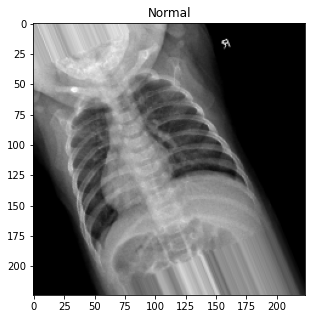

In [9]:
for idx in range(10):
    plt.figure(figsize=(5,5))
    plt.imshow(trainX[idx].reshape(224,224), cmap='gray')
    plt.title(labels[idx])

In [10]:
print("x_train shape:", trainX.shape)
print(trainX.shape[0], "train samples")
print(testX .shape[0], "test samples")

x_train shape: (32, 224, 224, 1)
32 train samples
32 test samples


In [18]:
model = Sequential(name = "Sequential")
model.add(Conv2D(16 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224, 224,1) , name="FirstConvolution"))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="FirstMaxPool"))
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , name="SecondConvolution"))
model.add(Dropout(0.1, name="Droupout1"))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="SecondMaxPool"))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , name="ThirdConvolution"))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="ThirdMaxPool"))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , name="ForthConvolution"))
model.add(Dropout(0.2 , name="Droupout2"))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="ForthMaxPool"))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , name="FifthConvolution"))
model.add(Dropout(0.2 , name="Droupout3"))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="FifthMaxPool"))
model.add(Flatten(name="Flatten"))
model.add(Dense(units = 128 , activation = 'relu' , name="Dense1"))
model.add(Dense(units = 64 , activation = 'relu' , name="Dense2"))
model.add(Dropout(0.2 , name="Droupout4"))
model.add(Dense(units = 32 , activation = 'relu' , name="Dense3"))
model.add(Dense(units = 1 , activation = 'sigmoid' , name="Dense4"))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstConvolution (Conv2D)    (None, 224, 224, 16)      160       
_________________________________________________________________
FirstMaxPool (MaxPooling2D)  (None, 112, 112, 16)      0         
_________________________________________________________________
SecondConvolution (Conv2D)   (None, 112, 112, 32)      4640      
_________________________________________________________________
Droupout1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
SecondMaxPool (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
ThirdConvolution (Conv2D)    (None, 56, 56, 64)        18496     
_________________________________________________________________
ThirdMaxPool (MaxPooling2D)  (None, 28, 28, 64)        0

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [20]:
history = model.fit(train, epochs = 20 , callbacks = [learning_rate_reduction])

Epoch 1/20
164/164 [==============================] - 80s 486ms/step - loss: 0.4289 - accuracy: 0.7899
Epoch 2/20
164/164 [==============================] - 79s 484ms/step - loss: 0.3209 - accuracy: 0.8631
Epoch 3/20
164/164 [==============================] - 78s 474ms/step - loss: 0.2851 - accuracy: 0.8813
Epoch 4/20
164/164 [==============================] - 76s 461ms/step - loss: 0.2540 - accuracy: 0.8972
Epoch 5/20
164/164 [==============================] - 75s 457ms/step - loss: 0.2265 - accuracy: 0.9115
Epoch 6/20
164/164 [==============================] - 75s 458ms/step - loss: 0.2245 - accuracy: 0.9149
Epoch 7/20
164/164 [==============================] - 76s 461ms/step - loss: 0.2007 - accuracy: 0.9234
Epoch 8/20
164/164 [==============================] - 75s 456ms/step - loss: 0.1939 - accuracy: 0.9274
Epoch 9/20
164/164 [==============================] - 74s 453ms/step - loss: 0.1740 - accuracy: 0.9369
Epoch 10/20
164/164 [==============================] - 75s 460ms/step - l

In [21]:
print("Loss of the model is - " , model.evaluate(testX,testY)[0])
print("Accuracy of the model is - " , model.evaluate(testX,testY)[1]*100 , "%")

32/32 [==============================] - 0s 4ms/step
Loss of the model is -  0.509025514125824
32/32 [==============================] - 0s 3ms/step
Accuracy of the model is -  93.75 %


In [22]:
predictions = model.predict_classes(testX)
predictions = predictions.reshape(1,-1)[0]
print(predictions[:15])

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [23]:
print(classification_report(testY, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       1.00      0.78      0.88         9
   Normal (Class 1)       0.92      1.00      0.96        23

           accuracy                           0.94        32
          macro avg       0.96      0.89      0.92        32
       weighted avg       0.94      0.94      0.93        32



In [24]:
print('Confusion Matrix\n')
matrix = confusion_matrix(testY,predictions)
print(matrix)

Confusion Matrix

[[ 7  2]
 [ 0 23]]


In [25]:
correct = np.nonzero(predictions == testY)[0]
incorrect = np.nonzero(predictions != testY)[0]
print(len(correct), len(incorrect))

30 2


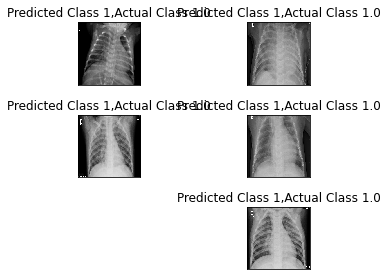

In [26]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testX[c].reshape(224, 224), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], testY[c]))
    plt.show()
    i += 1

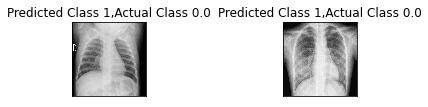

In [27]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testX[c].reshape(224, 224), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], testY[c]))
    plt.show()
    i += 1